In [1]:
#Library for DMD control
from ALP4 import *

#Standard Imports
import numpy as np
import time
import sys
from scipy.interpolate import interp1d
from scipy import ndimage
from PIL import Image

#PyTorch Imports (not needed for data collection)
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision

#Library for LCD control
import slmpy
import wx

In [2]:
#Load LCD2

Sony = slmpy.SLMdisplay(monitor = 2, isImageLock = True)
resX, resY = Sony.getSize()
print(resX)
print(resY)
n_rows = 1024
n_cols = 768

1024
768


C:\Users\mcmah\Anaconda3\envs\ONN_Smart_Sensor\lib\site-packages\slmpy-0.2.0-py3.9.egg\slmpy\slmpy.py:86: wxPyDeprecationWarning: Using deprecated class. Use Cursor instead.
  cursor = wx.StockCursor(wx.CURSOR_BLANK)


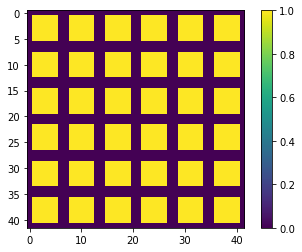

In [3]:
#Create windows for each neuron for each fanned out copy in optical fully connected layer 2

indi_neuron = np.ones((7, 7))
indi_neuron[0, :] = 0
indi_neuron[6, :] = 0
indi_neuron[:, 0] = 0
indi_neuron[:, 6] = 0
W2 = np.tile(indi_neuron, (6, 6))
plt.figure()
plt.imshow(W2)
plt.colorbar()
plt.show()

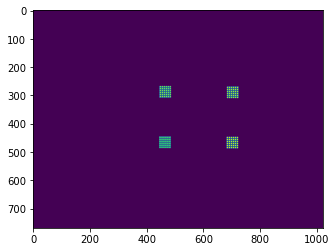

In [4]:
#Use rois of camera 3/final measurement camera from Data_Collection.ipynb to upload the windows created above to the LCD
ROI_LCD_2 = np.array([[267, 446], [269, 684], [445, 445], [446, 683]])
array = np.zeros((n_cols, n_rows))
width = 42
for q in range (4):
    array[ROI_LCD_2[q][0] : ROI_LCD_2[q][0] + width, \
          ROI_LCD_2[q][1] : ROI_LCD_2[q][1] + width] = 255*W2
array = (array).astype(np.uint8)
plt.figure()
plt.imshow(array)
plt.show()

array = (array).astype(np.uint8)
Sony.updateArray(array)

#Should check neuron alignment to the windows to ensure best results

In [5]:
#Load layer 2 weights to upload to the LCD

LCD_weights = np.load('LCD_Weights_1600_4_nonlinear.npz')['weights2']
print(LCD_weights.shape)

(4, 36)


(42, 42)


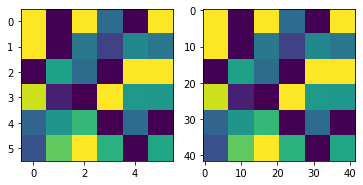

In [6]:
#Reshape weights to fit size of each fanned out copy on LCD

temp = np.repeat(np.repeat(LCD_weights[0].reshape(6, 6), 7, axis = 1), 7, axis = 0)
print(temp.shape)

f, a = plt.subplots(1, 2)
a[0].imshow(LCD_weights[0].reshape(6, 6))
a[1].imshow(temp)

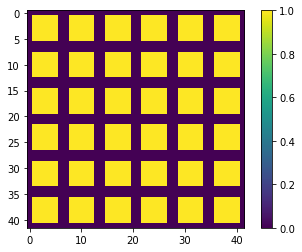

In [7]:
#Redefining windows - exactly the same code as used above

indi_neuron = np.ones((7, 7))
indi_neuron[0, :] = 0
indi_neuron[6, :] = 0
indi_neuron[:, 0] = 0
indi_neuron[:, 6] = 0
W = np.tile(indi_neuron, (6, 6))
plt.figure()
plt.imshow(W)
plt.colorbar()
plt.show()

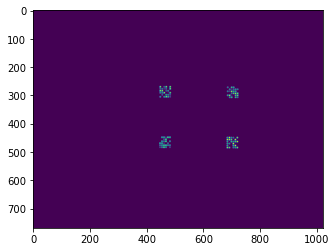

In [8]:
#Upload weights to LCD 2

array = np.zeros((n_cols, n_rows))
width = 42
for q in range (4):
    temp = np.repeat(np.repeat(LCD_weights[q].reshape(6, 6), \
                               7, axis = 1), 7, axis = 0)*W
    
    array[ROI_LCD_2[q][0] : ROI_LCD_2[q][0] + width, \
          ROI_LCD_2[q][1] : ROI_LCD_2[q][1] + width] = np.fliplr(temp)
array = (array).astype(np.uint8)
plt.figure()
plt.imshow(array)
plt.show()
Sony.updateArray(array)

In [9]:
Sony.close()